In [88]:
pip install tabula-py

Note: you may need to restart the kernel to use updated packages.


In [89]:
!pip install pymongo

     |████████████████████████████████| 358kB 1.6MB/s eta 0:00:01


In [90]:
import tabula
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymongo
import json

In [91]:
df = tabula.read_pdf('/Users/suruchichaudhary/Desktop/project3/november--rd-2019.pdf', pages='all')
len(df)

9

In [93]:
tabula.read_pdf("november--rd-2019.pdf", output_format="json", pages="all")
    
    

[{'extraction_method': 'lattice',
  'top': 86.006256,
  'left': 18.85972,
  'width': 754.5167236328125,
  'height': 489.0744934082031,
  'right': 773.37646,
  'bottom': 575.08075,
  'data': [[{'top': 86.006256,
     'left': 18.85972,
     'width': 36.515281677246094,
     'height': 44.89373779296875,
     'text': 'RD'},
    {'top': 86.006256,
     'left': 55.375,
     'width': 223.8499755859375,
     'height': 13.327079772949219,
     'text': 'CRIMES AGAINST PERSONS'},
    {'top': 86.006256,
     'left': 279.22498,
     'width': 360.07501220703125,
     'height': 13.327079772949219,
     'text': 'CRIMES AGAINST PROPERTY'},
    {'top': 86.006256,
     'left': 639.3,
     'width': 134.07647705078125,
     'height': 13.327079772949219,
     'text': 'TOTALS'},
    {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''},
    {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''},
    {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''},
    {'top': 0.0, 

In [9]:
dfMerge = pd.concat([df[0],
                   df[1],
                   df[2],
                   df[3],
                   df[4],
                   df[5],
                   df[6],
                   df[7],
                   df[8]],
                   ignore_index=True)
dfMerge



,RD,CRIMES AGAINST PERSONS,CRIMES AGAINST PROPERTY,TOTALS,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,MURDER,MANSLTR,RAPE,ROBBERY,AGGRAV\rASSAULT,BURGLARY,LARCENY THEFT,AUTO\rTHEFT,ARSON,TOTAL\rPART 1,TOTAL\rPART 2,GRAND\rTOTAL,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,RES,COM,AUTO\rBURG,GRAND\rTHEFT,PETTY\rTHEFT,BIKE\rTHEFT,NaN,NaN,NaN,NaN,NaN
2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1
3,20,NaN,NaN,1,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,5,1,6
4,21,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,3,NaN,1,NaN,5,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,SHPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,2,3
301,Unk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,0,1
302,2019,1,0,23,87,94,82,77,140,123,285,18,192,10,"1,132","1,346","2,478"
303,2018,2,0,19,91,84,158,82,167,123,303,28,173,8,"1,238","1,314","2,552"


In [10]:
# dfMerge.columns = dfMerge.columns.str.replace('Unnamed.*', '') + \
#              dfMerge.iloc[0].fillna('') + \
#              dfMerge.iloc[1].fillna('')

# dfMerge.drop([0,1], inplace=True)

In [11]:
dfMerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 17 columns):
RD                         287 non-null object
CRIMES AGAINST PERSONS     13 non-null object
CRIMES AGAINST PROPERTY    12 non-null object
TOTALS                     33 non-null object
Unnamed: 0                 79 non-null object
Unnamed: 1                 80 non-null object
Unnamed: 2                 83 non-null object
Unnamed: 3                 76 non-null object
Unnamed: 4                 119 non-null object
Unnamed: 5                 112 non-null object
Unnamed: 6                 162 non-null object
Unnamed: 7                 31 non-null object
Unnamed: 8                 130 non-null object
Unnamed: 9                 13 non-null object
Unnamed: 10                287 non-null object
Unnamed: 11                287 non-null object
Unnamed: 12                287 non-null object
dtypes: object(17)
memory usage: 40.6+ KB


In [12]:
dfMerge

,RD,CRIMES AGAINST PERSONS,CRIMES AGAINST PROPERTY,TOTALS,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,MURDER,MANSLTR,RAPE,ROBBERY,AGGRAV\rASSAULT,BURGLARY,LARCENY THEFT,AUTO\rTHEFT,ARSON,TOTAL\rPART 1,TOTAL\rPART 2,GRAND\rTOTAL,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,RES,COM,AUTO\rBURG,GRAND\rTHEFT,PETTY\rTHEFT,BIKE\rTHEFT,NaN,NaN,NaN,NaN,NaN
2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1
3,20,NaN,NaN,1,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,5,1,6
4,21,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,3,NaN,1,NaN,5,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,SHPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,2,3
301,Unk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,0,1
302,2019,1,0,23,87,94,82,77,140,123,285,18,192,10,"1,132","1,346","2,478"
303,2018,2,0,19,91,84,158,82,167,123,303,28,173,8,"1,238","1,314","2,552"


In [13]:
tabula.convert_into("november--rd-2019.pdf", "output.csv", output_format="csv", pages='all')

In [114]:
lb_file_csv = pd.read_csv("output.csv", index_col=0)
lb_file_csv

,CRIMES AGAINST PERSONS,CRIMES AGAINST PROPERTY,TOTALS,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
RD,,,,,,,,,,,,,,,,
NaN,MURDER,MANSLTR,RAPE,ROBBERY,AGGRAV\rASSAULT,BURGLARY,LARCENY THEFT,AUTO\rTHEFT,ARSON,TOTAL\rPART 1,TOTAL\rPART 2,GRAND\rTOTAL,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,RES,COM,AUTO\rBURG,GRAND\rTHEFT,PETTY\rTHEFT,BIKE\rTHEFT,NaN,NaN,NaN,NaN,NaN
010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1
020,NaN,NaN,1,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,5,1,6
021,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,3,NaN,1,NaN,5,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SHPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,2,3
Unk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,0,1
2019,1,0,23,87,94,82,77,140,123,285,18,192,10,"1,132","1,346","2,478"


In [15]:
file_csv.columns=[['CA-PERSONS_MURDER','CA-PERSONS_MANSLTR','CA-PERSONS_RAPE','CA-PERSONS_ROBBERY','CA-PERSONS_AGGRAV\ASSAULT',
                'CA-PROPERTY_BURGLARY_RES','CA-PROPERTY_BURGLARY_COM','CA-PROPERTY_LARCENY_THEFT_AUTO\BURG','CA-PROPERTY_LARCENY_THEFT_GRAND\THEFT','CA-PROPERTY_LARCENY THEFT_PETTY\THEFT'
                ,'CA-PROPERTY_LARCENY_THEFT_BIKE\THEFT','CA-PROPERTY_AUTO\THEFT','CA-PROPERTY_ARSON','TOTAL-GRAND-1','TOTAL_GRAND_2','GRAND_TOTAL']]

file_csv.head()


,CA-PERSONS_MURDER,CA-PERSONS_MANSLTR,CA-PERSONS_RAPE,CA-PERSONS_ROBBERY,CA-PERSONS_AGGRAV\ASSAULT,CA-PROPERTY_BURGLARY_RES,CA-PROPERTY_BURGLARY_COM,CA-PROPERTY_LARCENY_THEFT_AUTO\BURG,CA-PROPERTY_LARCENY_THEFT_GRAND\THEFT,CA-PROPERTY_LARCENY THEFT_PETTY\THEFT,CA-PROPERTY_LARCENY_THEFT_BIKE\THEFT,CA-PROPERTY_AUTO\THEFT,CA-PROPERTY_ARSON,TOTAL-GRAND-1,TOTAL_GRAND_2,GRAND_TOTAL
RD,,,,,,,,,,,,,,,,
NaN,MURDER,MANSLTR,RAPE,ROBBERY,AGGRAV\rASSAULT,BURGLARY,LARCENY THEFT,AUTO\rTHEFT,ARSON,TOTAL\rPART 1,TOTAL\rPART 2,GRAND\rTOTAL,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,RES,COM,AUTO\rBURG,GRAND\rTHEFT,PETTY\rTHEFT,BIKE\rTHEFT,NaN,NaN,NaN,NaN,NaN
010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1
020,NaN,NaN,1,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,5,1,6
021,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,3,NaN,1,NaN,5,1,6


In [115]:
total_crimes = file_csv.loc[["2018","2019"]]
total_crimes_df = pd.DataFrame(total_crimes)
total_crimes_df.to_csv('crimedatalongbeach.csv')
crimedata_longbeach = pd.read_csv('crimedatalongbeach.csv',index_col=0)
total_crimes_df

,CA-PERSONS_MURDER,CA-PERSONS_MANSLTR,CA-PERSONS_RAPE,CA-PERSONS_ROBBERY,CA-PERSONS_AGGRAV\ASSAULT,CA-PROPERTY_BURGLARY_RES,CA-PROPERTY_BURGLARY_COM,CA-PROPERTY_LARCENY_THEFT_AUTO\BURG,CA-PROPERTY_LARCENY_THEFT_GRAND\THEFT,CA-PROPERTY_LARCENY THEFT_PETTY\THEFT,CA-PROPERTY_LARCENY_THEFT_BIKE\THEFT,CA-PROPERTY_AUTO\THEFT,CA-PROPERTY_ARSON,TOTAL-GRAND-1,TOTAL_GRAND_2,GRAND_TOTAL
RD,,,,,,,,,,,,,,,,
2018,2,0,19,91,84,158,82,167,123,303,28,173,8,"1,238","1,314","2,552"
2019,1,0,23,87,94,82,77,140,123,285,18,192,10,"1,132","1,346","2,478"


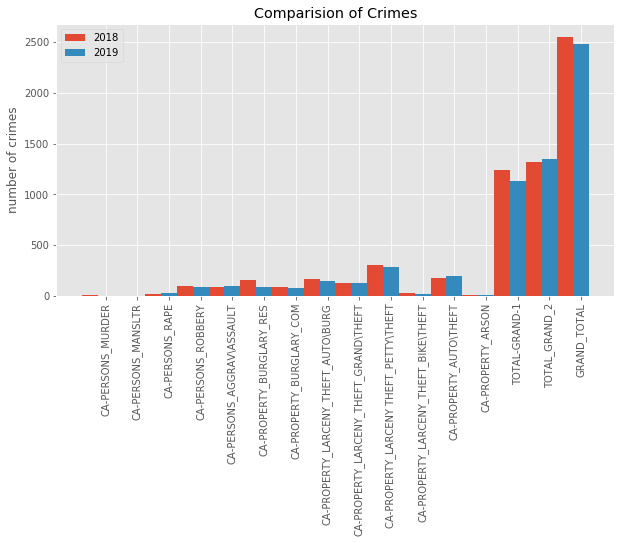

In [103]:
N = 16
# labels = ['CA-PERSONS_MURDER','CA-PERSONS_MANSLTR','CA-PERSONS_RAPE','CA-PERSONS_ROBBERY','CA-PERSONS_AGGRAV\ASSAULT','CA-PROPERTY_BURGLARY_RES','CA-PROPERTY_BURGLARY_COM','CA-PROPERTY_LARCENY_THEFT_AUTO\BURG','CA-PROPERTY_LARCENY_THEFT_GRAND\THEFT','CA-PROPERTY_LARCENY THEFT_PETTY\THEFT','CA-PROPERTY_LARCENY_THEFT_BIKE\THEFT','CA-PROPERTY_AUTO\THEFT','CA-PROPERTY_ARSON','TOTAL-GRAND-1','TOTAL_GRAND_2','GRAND_TOTAL']
total_crimes_in_2018 = [2,0,19,91,84,158,82,167,123,303,28,173,8,1238,1314,2552]
total_crimes_in_2019 = [1,0,23,87,94,82,77,140,123,285,18,192,10,1132,1346,2478]


fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(N) 
width = 0.5       
plt.bar(ind, total_crimes_in_2018, width, label='2018')
plt.bar(ind + width, total_crimes_in_2019, width,
    label='2019')

plt.ylabel('number of crimes')
plt.title('Comparision of Crimes')

plt.xticks(ind + width , ('CA-PERSONS_MURDER','CA-PERSONS_MANSLTR','CA-PERSONS_RAPE','CA-PERSONS_ROBBERY','CA-PERSONS_AGGRAV\ASSAULT','CA-PROPERTY_BURGLARY_RES','CA-PROPERTY_BURGLARY_COM','CA-PROPERTY_LARCENY_THEFT_AUTO\BURG','CA-PROPERTY_LARCENY_THEFT_GRAND\THEFT','CA-PROPERTY_LARCENY THEFT_PETTY\THEFT','CA-PROPERTY_LARCENY_THEFT_BIKE\THEFT','CA-PROPERTY_AUTO\THEFT','CA-PROPERTY_ARSON','TOTAL-GRAND-1','TOTAL_GRAND_2','GRAND_TOTAL'))
plt.xticks(rotation=90)
plt.legend(loc='best')


plt.show()

In [116]:
ca_crime_csv = pd.read_csv('ca_offenses_by_county.csv', index_col=0)
ca_crime_csv

,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape(legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
Metropolitan/Nonmetropolitan,,,,,,,,,,,,
Metropolitan Counties,Alameda,510,6.0,13.0,NaN,177,314,"2,077",463,985,629,11.0
Metropolitan Counties,Butte3,155,4.0,20.0,NaN,14,117,"1,422",708,693,21,0.0
Metropolitan Counties,Contra Costa,426,14.0,24.0,NaN,153,235,"2,013",660,"1,332",21,18.0
Metropolitan Counties,El Dorado3,252,9.0,46.0,NaN,32,165,"2,031",577,"1,412",42,4.0
Metropolitan Counties,Fresno,962,8.0,32.0,NaN,112,810,"3,810","1,398","1,838",574,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
index = pd.MultiIndex.from_tuples([],
                                 names=['RD'])
columns = pd.MultiIndex.from_tuples([('CRIMES AGAINST PERSONS','MURDER'),('CRIMES AGAINST PERSONS','MANSLTR'),('CRIMES AGAINST PERSONS','RAPE'),('CRIMES AGAINST PERSONS','ROBBERY'),('CRIMES AGAINST PERSONS','AGGRAV\rASSAULT'),
                                     ('CRIMES AGAINST PROPERTY','BURGLARY',('BURGLARY','RES'),('BURGLARY','COM')),('CRIMES AGAINST PROPERTY','LARCENY THEFT',('AUTO\rBURG','GRAND\rTHEFT','PETTY\rTHEFT','BIKE\rTHEFT')),('CRIMES AGAINST PROPERTY','AUTO\rTHEFT'),('CRIMES AGAINST PROPERTY','ARSON'),
                                     ('TOTALS','TOTAL\rPART 1'),('TOTALS','TOTAL\rPART 2'),('TOTALS','GRAND\rTOTAL')])


# data = dfMerge

new_data = pd.DataFrame(dfMerge, index=index, columns=columns)


new_data

Empty DataFrame
Columns: [(CRIMES AGAINST PERSONS, MURDER, nan, nan), (CRIMES AGAINST PERSONS, MANSLTR, nan, nan), (CRIMES AGAINST PERSONS, RAPE, nan, nan), (CRIMES AGAINST PERSONS, ROBBERY, nan, nan), (CRIMES AGAINST PERSONS, AGGRAV
ASSAULT, nan, nan), (CRIMES AGAINST PROPERTY, BURGLARY, (BURGLARY, RES), (BURGLARY, COM)), (CRIMES AGAINST PROPERTY, LARCENY THEFT, (AUTO
BURG, GRAND
THEFT, PETTY
THEFT, BIKE
THEFT), nan), (CRIMES AGAINST PROPERTY, AUTO
THEFT, nan, nan), (CRIMES AGAINST PROPERTY, ARSON, nan, nan), (TOTALS, TOTAL
PART 1, nan, nan), (TOTALS, TOTAL
PART 2, nan, nan), (TOTALS, GRAND
TOTAL, nan, nan)]
Index: []

In [40]:


new_data.head()

Empty DataFrame
Columns: [(CRIMES AGAINST PERSONS, MURDER, nan, nan), (CRIMES AGAINST PERSONS, MANSLTR, nan, nan), (CRIMES AGAINST PERSONS, RAPE, nan, nan), (CRIMES AGAINST PERSONS, ROBBERY, nan, nan), (CRIMES AGAINST PERSONS, AGGRAV
ASSAULT, nan, nan), (CRIMES AGAINST PROPERTY, BURGLARY, (BURGLARY, RES), (BURGLARY, COM)), (CRIMES AGAINST PROPERTY, LARCENY THEFT, (AUTO
BURG, GRAND
THEFT, PETTY
THEFT, BIKE
THEFT), nan), (CRIMES AGAINST PROPERTY, AUTO
THEFT, nan, nan), (CRIMES AGAINST PROPERTY, ARSON, nan, nan), (TOTALS, TOTAL
PART 1, nan, nan), (TOTALS, TOTAL
PART 2, nan, nan), (TOTALS, GRAND
TOTAL, nan, nan)]
Index: []

In [ ]:
crime_file = {
    "RD":[],
    "CRIMES AGAINST PERSONS":{
        "MURDER",
        "MANSLTR",
        "RAPE",
        "AGGRAV ASSAULT"},        
    "CRIMES AGAINST PROPERTY":{
        "BURGLARY":{
            "RES",
            "COM"},
        "LARCENY THEFT":{
            "AUTO BURG",
            "GRAND THEFT",
            "PETTY THEFT",
            "BIKE THEFT"},
        "AUTO THEFT",
        "ARSON"},
                         
    "TOTALS":{
        "TOTAL PART 1",
        "TOTAL PART 2",
        "GRAND TOTAL"}
}
                                     



In [ ]:
crime_file_pd = pd.read_csv(file)
crime_file_pd.columns


In [ ]:
crime_file_df = crime_file_pd.DataFrame({
    "RD":[],
    "CRIMES AGAINST PERSONS":["MURDER","MANSLTR","RAPE","AGGRAV ASSAULT"],
    "CRIMES AGAINST PROPERTY":["BURGLARY":["RES","COM"],"LARCENY THEFT":["AUTO BURG","GRAND THEFT","PETTY THEFT","BIKE THEFT"],"AUTO THEFT","ARSON",
    "TOTALS":["TOTAL PART 1","TOTAL PART 2","GRAND TOTAL"]
                                              })

crime_file_df                                         
                                               

In [ ]:
"MURDER","MANSLTR","RAPE","AGGRAV ASSAULT"
"BURGLARY":{"RES","COM"},"LARCENY THEFT":["AUTO BURG","GRAND THEFT","PETTY THEFT","BIKE THEFT"
["TOTAL PART 1","TOTAL PART 2","GRAND TOTAL"]